Import all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,ttest_rel,chisquare,chi2_contingency,f_oneway,kruskal,shapiro,levene,pearsonr,spearmanr,stats,skew,kurtosis
import pingouin as pg
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')
from category_encoders import TargetEncoder

Import the dataset view first 5 rows of data to get rough understanding of dependent and independent feature

Dependent Features: Datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered

Independent Feature: Count

In [ ]:
df = pd.read_csv("bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Problem Statement: Understand the relation between all dependent features with count of rental bikes.

Draw insights and recommendation for the explored outcomes   

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Weather & Environmental Features
Temperature (temp):
Mean: ~20.23°C
Range: 0.0°C to 41.0°C
Fairly wide range, indicating seasonal variation.

Feels-like Temperature (atemp):
Mean: ~23.65°C
Slightly higher than actual temperature, possibly due to humidity and wind effects.

Humidity:
Mean: ~61%
Range: 0% to 100%
High variability, which could influence user behavior (e.g., bike rentals).

Windspeed:
Mean: ~12.79
Range: 0.0 to 56.996
Some extreme values may need outlier treatment.

Temporal & Categorical Features
Season:
Values range from 1 to 4 (likely representing Spring, Summer, Fall, Winter).
Distribution appears balanced across seasons.

Holiday & Working Day:
Binary indicators (0 or 1).
Mean values suggest most days are non-holidays and working days.

Weather:
Coded values from 1 to 4.
Mean ~1.42 suggests most days have favorable weather conditions.

Casual Users:
Mean: ~36.02
Max: 367
High variability; casual usage spikes on certain days.

Registered Users:
Mean: ~155.55
Max: 886
Much higher than casual users, indicating strong reliance on regular users.

Total Count:
Mean: ~191.57
Max: 977
Registered users contribute significantly to total usage.

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


(10886, 12)

Total entries: 10,886 rows — a substantial dataset suitable for robust statistical analysis and modeling.

There are no null values in any column of the dataset

Lets check the outliers in the data

Text(0, 0.5, '')

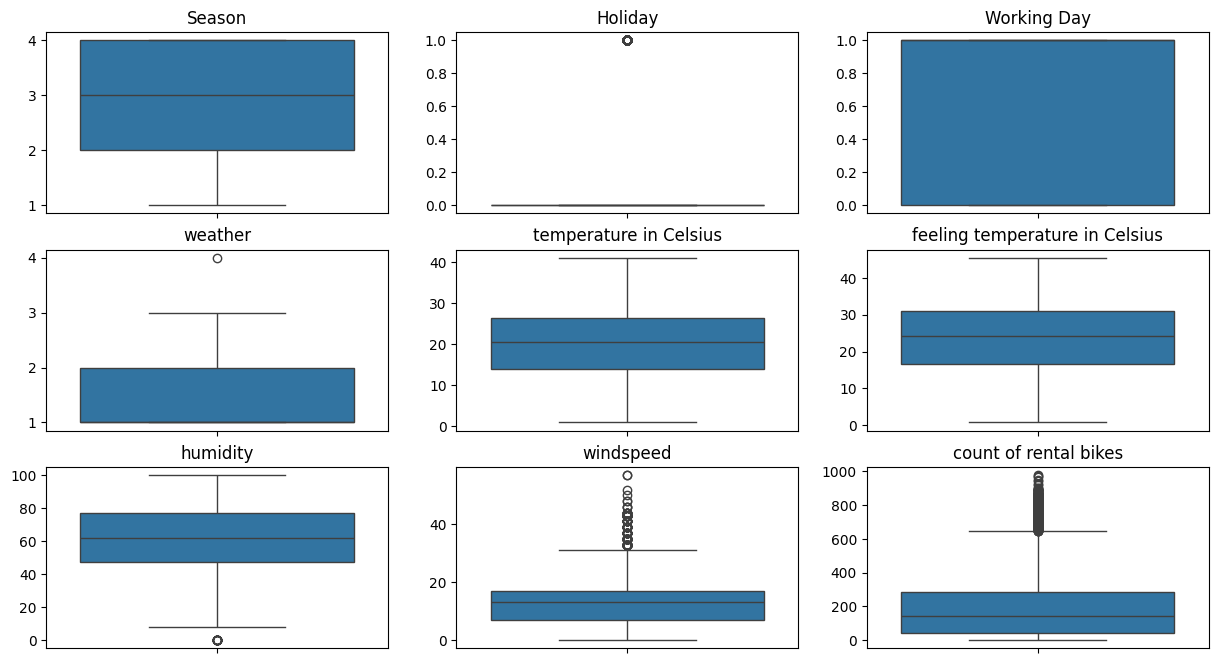

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.boxplot(data=df,y="season")
plt.title("Season")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,2)
sns.boxplot(data=df,y="holiday")
plt.title("Holiday")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,3)
sns.boxplot(data=df,y="workingday")
plt.title("Working Day")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,4)
sns.boxplot(data=df,y="weather")
plt.title("weather")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,5)
sns.boxplot(data=df,y="temp")
plt.title("temperature in Celsius")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,6)
sns.boxplot(data=df,y="atemp")
plt.title("feeling temperature in Celsius")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,7)
sns.boxplot(data=df,y="humidity")
plt.title("humidity")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,8)
sns.boxplot(data=df,y="windspeed")
plt.title("windspeed")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,9)
sns.boxplot(data=df,y="count")
plt.title("count of rental bikes")
plt.xlabel("")
plt.ylabel("")

In [ ]:
df["holiday"].value_counts()

,count
holiday,
0,10575
1,311


Even though the holiday column with category 1 has less data points compared to category 0, still it has enough data to do analysis. No need to treat outlier for hilday.

In [ ]:
df["weather"].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


There is only one data point for weather category 4, which is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Lets remove this one data point as it is not possible to analyse the data having only one data point

<Axes: xlabel='humidity', ylabel='Count'>

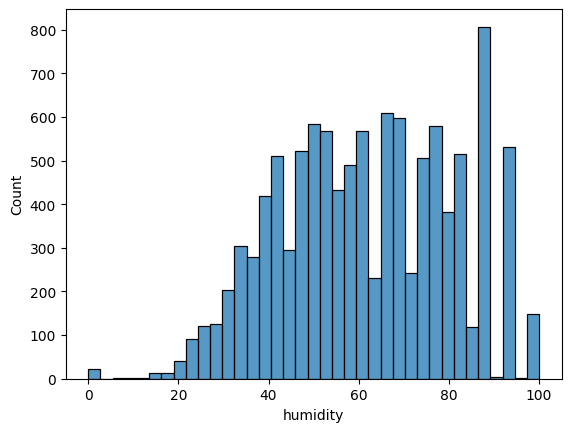

In [ ]:
sns.histplot(data=df,x="humidity")

<Axes: xlabel='windspeed', ylabel='Count'>

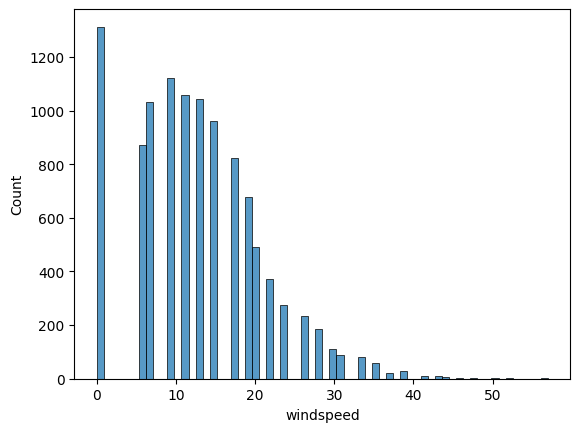

In [ ]:
sns.histplot(data=df,x="windspeed")

<Axes: xlabel='count', ylabel='Count'>

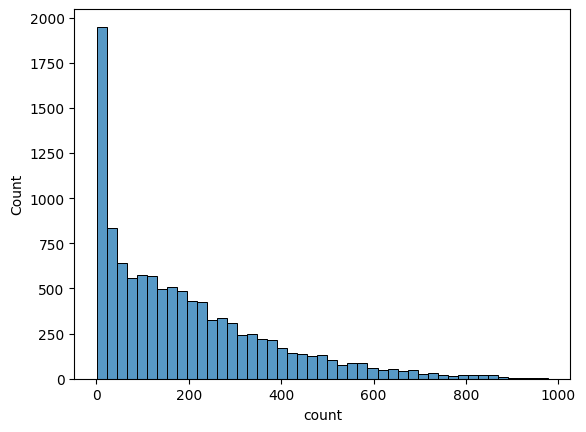

In [ ]:
sns.histplot(data=df,x="count")

Lets treat the outlier of weather,humidity,windspeed and count using percentile method by keeping 5th percentile value for allpoint below percentile 5 and by keeping 95 percentile value for all points above 95 percentile.

In [ ]:
df1 = df.copy()
for col in ["weather","humidity","windspeed","count"]:
  lower = np.percentile(df1[col],5)
  upper = np.percentile(df1[col],95)
  df1[col]=np.clip(df1[col],lower,upper)

Text(0, 0.5, '')

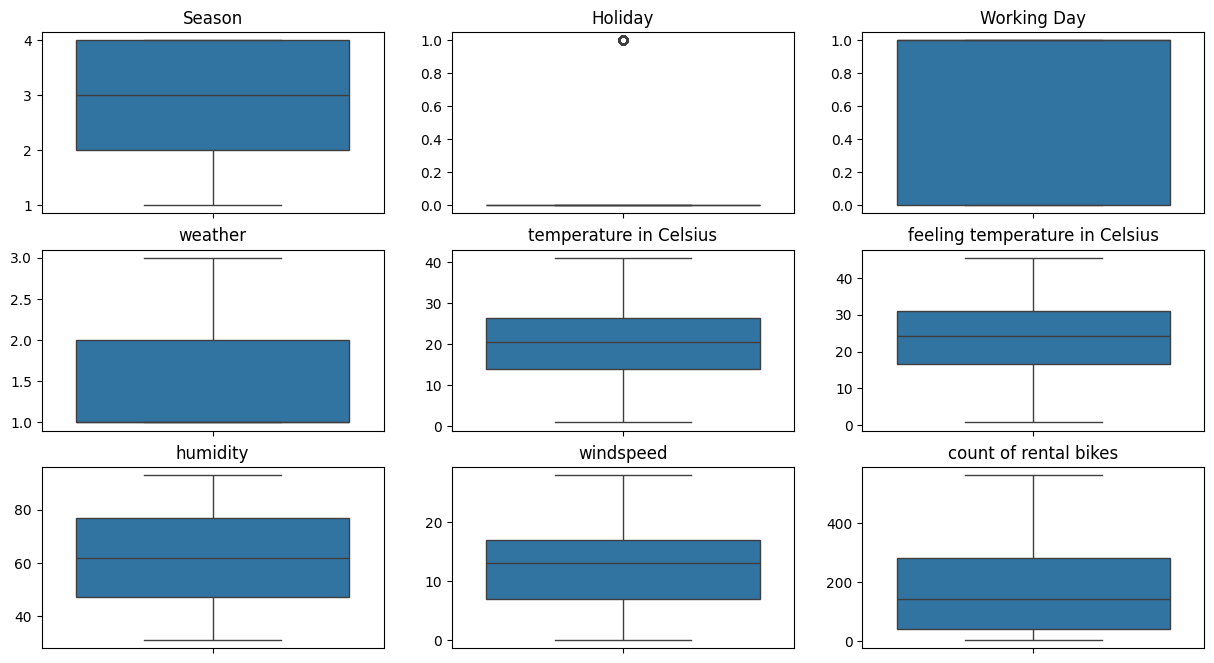

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.boxplot(data=df1,y="season")
plt.title("Season")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,2)
sns.boxplot(data=df1,y="holiday")
plt.title("Holiday")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,3)
sns.boxplot(data=df1,y="workingday")
plt.title("Working Day")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,4)
sns.boxplot(data=df1,y="weather")
plt.title("weather")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,5)
sns.boxplot(data=df1,y="temp")
plt.title("temperature in Celsius")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,6)
sns.boxplot(data=df1,y="atemp")
plt.title("feeling temperature in Celsius")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,7)
sns.boxplot(data=df1,y="humidity")
plt.title("humidity")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,8)
sns.boxplot(data=df1,y="windspeed")
plt.title("windspeed")
plt.xlabel("")
plt.ylabel("")
plt.subplot(3,3,9)
sns.boxplot(data=df1,y="count")
plt.title("count of rental bikes")
plt.xlabel("")
plt.ylabel("")

In [ ]:
np.any(df1.duplicated())

np.False_

 There is no duplicate data points in our dataset

In [ ]:
df1.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no null values in any of the column of the dataset

Text(0.5, 0, 'Rental Bike Count')

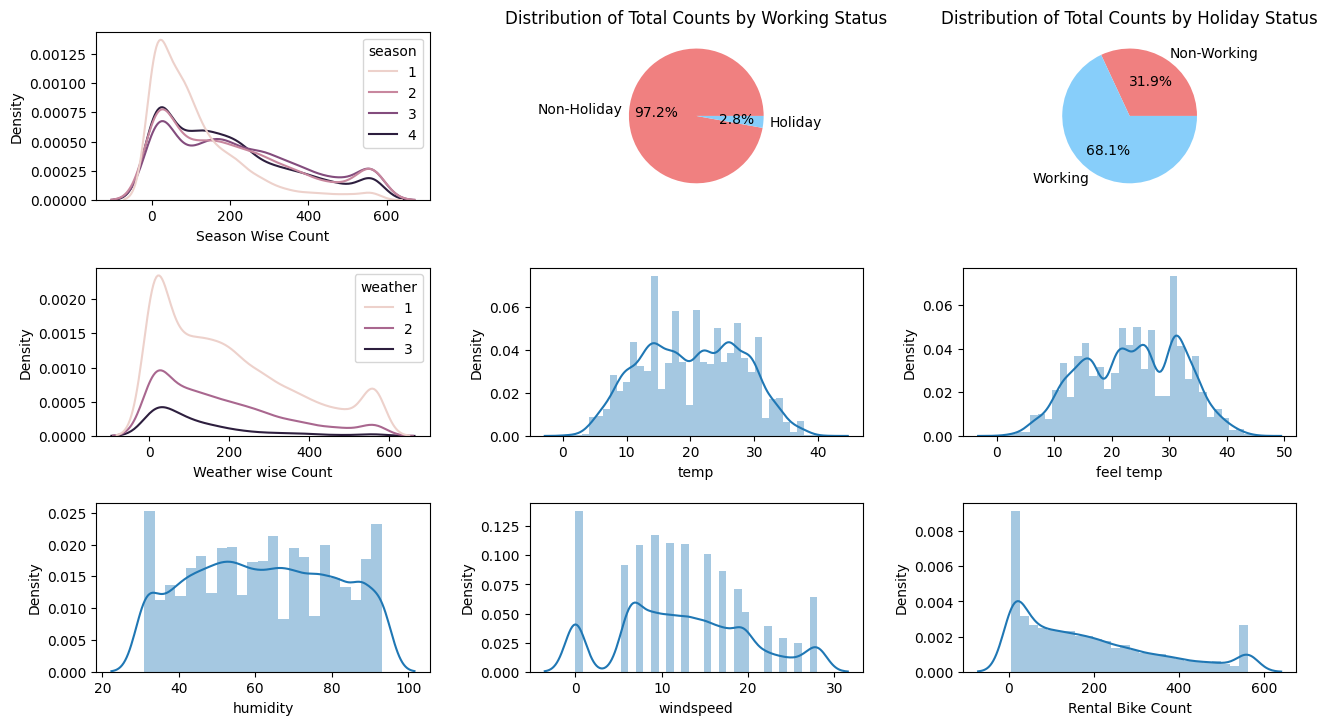

In [ ]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,
wspace=0.3, hspace=0.4)
plt.subplot(3,3,1)
sns.kdeplot(data=df1,x="count",hue="season")
plt.xlabel("Season Wise Count")
holiday_counts = df1.groupby('holiday')['count'].sum()
plt.subplot(3,3,2)
plt.pie(holiday_counts, labels=holiday_counts.index.map({0: 'Non-Holiday', 1: 'Holiday'}),
        autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Total Counts by Working Status')
working_counts = df1.groupby('workingday')['count'].sum()
plt.subplot(3,3,3)
plt.pie(working_counts, labels=working_counts.index.map({0: 'Non-Working', 1: 'Working'}),
        autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Total Counts by Holiday Status')
plt.subplot(3,3,4)
sns.kdeplot(data=df1,x="count",hue="weather")
plt.xlabel("Weather wise Count")
plt.subplot(3,3,5)
sns.distplot(df1["temp"])
plt.xlabel("temp")
plt.subplot(3,3,6)
sns.distplot(df1["atemp"])
plt.xlabel("feel temp")
plt.subplot(3,3,7)
sns.distplot(df1["humidity"])
plt.xlabel("humidity")
plt.subplot(3,3,8)
sns.distplot(df1["windspeed"])
plt.xlabel("windspeed")
plt.subplot(3,3,9)
sns.distplot(df1["count"])
plt.xlabel("Rental Bike Count")

Brief Insights
Seasonal Trends:
Bike rentals vary across seasons, with certain seasons showing higher density of usage.

Weather Impact:
Rentals are more frequent in favorable weather conditions (weather type 1 and 2).

Working & Holiday Status:
97.2% of rentals occur on non-holidays.
68.1% occur on working days, indicating strong weekday usage.

Temperature Influence:
Rentals increase with temperature and feel temperature, peaking around moderate warmth.

Humidity & Windspeed:
High humidity and windspeed tend to reduce rental density.

Rental Count Distribution:
Most rental counts cluster around a central range, indicating consistent daily usage patterns.

Recommendations
Optimize for Weekdays:
Focus marketing and operational efforts on working days, which show higher rental activity.

Weather-Based Planning:
Promote rentals during moderate weather and temperature conditions.

Seasonal Campaigns:
Tailor promotions and fleet availability based on seasonal demand patterns.

Comfort Enhancements:
Consider solutions to improve rider comfort during humid or windy conditions (e.g., shaded paths, wind barriers).

<Axes: >

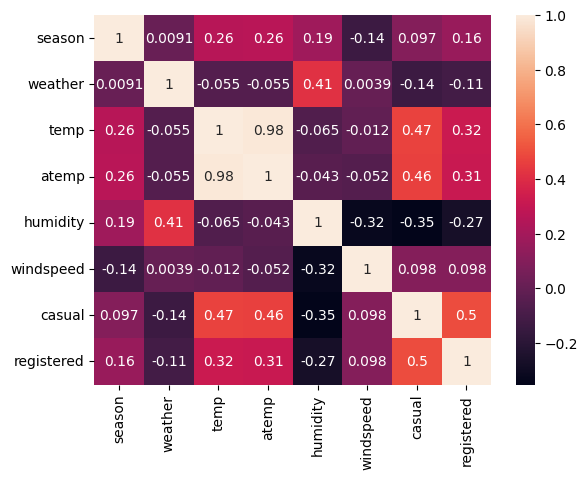

In [ ]:
 df2=df1[["season","weather","temp","atemp","humidity","windspeed","casual","registered"]]
 sns.heatmap(df2.corr(),annot=True)

Insights from the Correlation Heatmap
Strong Positive Correlation:
Temperature (temp) vs Apparent Temperature (atemp): Correlation of 0.98 — nearly identical, suggesting redundancy in modeling.

User Behavior vs Weather:
Casual Users:
Positively correlated with temp (0.47) and atemp (0.46).
Negatively correlated with humidity (-0.35).

Registered Users:
Positively correlated with temp (0.32) and atemp (0.31).
Negatively correlated with humidity (-0.27).

Other Observations:
Windspeed has weak correlations across the board.
Season and weather show mild correlations with user counts.

Recommendations
Weather-Based Promotions:
Target warmer days for promotions, as higher temperatures increase both casual and registered user activity.

Humidity Mitigation:
Explore ways to improve comfort during humid conditions (e.g., shaded routes, hydration stations).

Feature Selection for Modeling:
Consider dropping either temp or atemp due to high redundancy.
Include humidity and temp as key predictors in demand forecasting models.

Seasonal Strategy:
Align marketing and operational planning with seasonal trends and weather forecasts to maximize engagement.

Lets drop column atemp from the dataset

In [ ]:
df3=df1.drop("atemp",axis=1)

# Q.   Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

 Q.  Check if the demand of bicycles on rent is the same for different Weather conditions?
 1) Normality Test :
 First we will do Shapiro-Wilk's test to check the data is Normally distributed or not.

 Shapiro-Wilk Test
 Null Hypothesis, H0 = weekday and weekend rental counts are normally distributed
 Alternate Hypothesis, Ha = weekday and weekend rental counts are not Normally distributed

In [ ]:
df3["datetime"]=pd.to_datetime(df3["datetime"])
df3["dayofweek"] = df3["datetime"].dt.day_of_week
weekend_rides = df3[df3["dayofweek"].isin([5,6])]["count"]
weekday_rides = df3[df3["dayofweek"].isin([0,1,2,3,4])]["count"]

In [ ]:
weekday_stats,weekday_p_value = shapiro(weekday_rides)
weekend_stats,weekend_p_value = shapiro(weekend_rides)

In [ ]:
print("The Shapiro test P value of weekday rental count is ",weekday_p_value)
if(weekday_p_value <= 0.05):
    print("Successfully rejected null hypothesis, the weekday rental count is not normally distributed")
else:
    print("Accepted null hypothesis, the weekday rental count is normally distributed")
print()
print("The Shapiro test P value of weekend rental count is ",weekend_p_value)
if(weekend_p_value <= 0.05):
    print("Successfully rejected null hypothesis, the weekend rental count is not normally distributed")
else:
    print("Accepted null hypothesis, the weekend rental countr is normally distributed")
print()
if(weekday_p_value<=0.05 or weekend_p_value<=0.05):
    print("Either weekday rental counts or weekend rental counts are not normally distributed, we have to use non parametric test")
else:
    print("Both weekday rental counts and weekend rental counts follows normal distribution, lets go to step 2, to check for equal variance test")

The Shapiro test P value of weekday rental count is  1.830897055821748e-58
Successfully rejected null hypothesis, the weekday rental count is not normally distributed

The Shapiro test P value of weekend rental count is  6.140536423454815e-44
Successfully rejected null hypothesis, the weekend rental count is not normally distributed

Either weekday rental counts or weekend rental counts are not normally distributed, we have to use non parametric test


 As both the tests, normality test and variance test are failing, we will go for non parametric test to find wether different weather conditions have similar median or not.

 Kruskal Wallis Test

 Null Hypothesis, H0 = All the weather conditions have same median
 Alternate Hypothesis, Ha = Atleast one of the weather condition have significantly different median as compared to others

 Significance Level, alpha = 0.05

In [ ]:
kw_stat,kw_p_value = kruskal(weekend_rides,weekday_rides)
alpha = 0.05

In [ ]:
print("The Kruskal test P value of weekday and weekend is ",kw_p_value)
if(kw_p_value <= alpha):
    print("Successfully rejected null hypothesis, weekday rental counts and weekend rental counts have significantly different median as compared to each others")
else:
    print("Accepted null hypothesis, weekday rental counts and weekend rental counts have same median")

The Kruskal test P value of weekday and weekend is  0.8607309691396063
Accepted null hypothesis, weekday rental counts and weekend rental counts have same median


 Insights
Normality Test (Shapiro-Wilk):
Both weekday and weekend rental counts are not normally distributed.
Indicates the need for non-parametric testing.

Kruskal-Wallis Test:
P-value = 0.86, which is greater than α = 0.05.
Fail to reject the null hypothesis: There is no significant difference in the median rental counts between weekdays and weekends.

 Recommendations
Uniform Demand Strategy:
Since demand is statistically similar across weekdays and weekends, maintain consistent bike availability throughout the week.

Operational Efficiency:
Avoid overstaffing or understocking based on day-of-week assumptions — instead, focus on hourly or seasonal trends.

Further Segmentation:
Explore time-of-day or seasonal patterns to uncover more granular demand differences.
Consider combining weather and day-type for deeper insights (e.g., rainy weekends vs sunny weekdays).

Marketing & Promotions:
Design promotions that run across all days, rather than targeting weekends only.

# Q.  Check if the demand of bicycles on rent is the same for different Weather conditions?

 1) Normality Test :
 First we will do Shapiro-Wilk's test to check the data is Normally distributed or not.

 Shapiro-Wilk Test
 Null Hypothesis, H0 = Each weather category is normally distributed
 Alternate Hypothesis, Ha = One of the category is not Normally distributed

In [ ]:
clear = df3[df3["weather"]==1]["count"]
mist_cloudy = df3[df3["weather"]==2]["count"]
light_snow = df3[df3["weather"]==3]["count"]

In [ ]:
clear_stats,clear_p_value = shapiro(clear)
mist_cloudy_stats,mist_cloudy_p_value = shapiro(mist_cloudy)
snow_stats,snow_p_value = shapiro(light_snow)

In [ ]:
print("The Shapiro test P value of category clear weather is ",clear_p_value)
if(clear_p_value <= 0.05):
    print("Successfully rejected null hypothesis, the category clear weather is not normally distributed")
else:
    print("Accepted null hypothesis, the category clear weather is normally distributed")
print()
print("The Shapiro test P value of category mist and cloudy weather is ",mist_cloudy_p_value)
if(clear_p_value <= 0.05):
    print("Successfully rejected null hypothesis, the category mist and cloudy weather is not normally distributed")
else:
    print("Accepted null hypothesis, the category mist and cloudy weather is normally distributed")
print()
print("The Shapiro test P value of category light snow weather is ",snow_p_value)
if(clear_p_value <= 0.05):
    print("Successfully rejected null hypothesis, the category light snow weather is not normally distributed")
else:
    print("Accepted null hypothesis, the category light snow weather is normally distributed")
print()
if(clear_p_value<=0.05 or mist_cloudy_p_value<=0.05 or snow_p_value<=0.05):
    print("One or more category of weather is not normally distributed, we have to use non parametric test")
else:
    print("All the weather category data follows normal distribution, lets go to step 2, to check for equal variance test")



The Shapiro test P value of category clear weather is  7.9268531910647665e-56
Successfully rejected null hypothesis, the category clear weather is not normally distributed

The Shapiro test P value of category mist and cloudy weather is  1.025100617440154e-40
Successfully rejected null hypothesis, the category mist and cloudy weather is not normally distributed

The Shapiro test P value of category light snow weather is  2.342293811545836e-31
Successfully rejected null hypothesis, the category light snow weather is not normally distributed

One or more category of weather is not normally distributed, we have to use non parametric test


 Step 2: Levene Test
 Null Hypothesis, H0 = All the categories in weather column have same variance
 Alternate Hypothesis, Ha = One of the category in weather column have significantly different variance

In [ ]:
var_stat,p_value = levene(clear,mist_cloudy,light_snow)

In [ ]:
print("The Levene test P value of weather column is ",p_value)
if(p_value <= 0.05):
    print("Successfully rejected null hypothesis, one of the category in weather column have significantly different variance")
else:
    print("Accepted null hypothesis, All categories in wheather column have same variance")

The Levene test P value of weather column is  1.7289026679234263e-41
Successfully rejected null hypothesis, one of the category in weather column have significantly different variance


 As both the tests, normality test and variance test are failing, we will go for non parametric test to find wether different weather conditions have similar median or not.

 Kruskal Wallis Test

 Null Hypothesis, H0 = All the weather conditions have same median
 Alternate Hypothesis, Ha = Atleast one of the weather condition have significantly different median as compared to others

 Significance Level, alpha = 0.05

In [ ]:
k_stat,kruskal_p_value = kruskal(clear,mist_cloudy,light_snow)
alpha = 0.05

In [ ]:
print("The Kruskal test P value of weather conditions is ",kruskal_p_value)
if(kruskal_p_value <= alpha):
    print("Successfully rejected null hypothesis, Atleast one of the weather condition have significantly different median as compared to others")
else:
    print("Accepted null hypothesis, All the weather conditions have same median")

The Kruskal test P value of weather conditions is  4.004547007729705e-45
Successfully rejected null hypothesis, Atleast one of the weather condition have significantly different median as compared to others


<Axes: ylabel='count'>

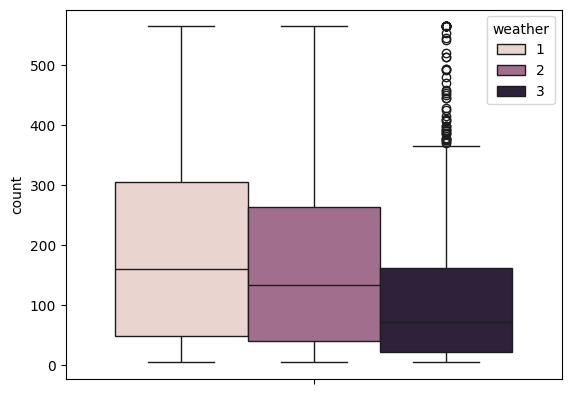

In [ ]:
sns.boxplot(data=df3,y="count",hue="weather")

In [ ]:
skew(clear),skew(mist_cloudy),skew(light_snow)

(np.float64(0.7361688811482903),
 np.float64(0.9291924193146522),
 np.float64(1.69769621471072))

In [ ]:
kurtosis(clear),kurtosis(mist_cloudy),kurtosis(light_snow)

(np.float64(-0.5263901906224837),
 np.float64(0.008253074373409053),
 np.float64(2.6283779501808295))

 Insights from Skewness and Kurtosis Analysis
1. Skewness:
Clear Weather: 0.74 → Moderately right-skewed; more low rental counts, fewer high ones.
Mist/Cloudy: 0.93 → Right-skewed; slightly more pronounced than clear weather.
Light Snow: 1.70 → Strongly right-skewed; most rentals are low, with rare high counts.

2. Kurtosis:
Clear Weather: -0.53 → Platykurtic; flatter distribution, fewer extreme values.
Mist/Cloudy: 0.01 → Mesokurtic; close to normal distribution.
Light Snow: 2.63 → Leptokurtic; more peaked with heavier tails, indicating more outliers.

Recommendations
Demand Forecasting:
Use non-parametric models for light snow conditions due to high skewness and kurtosis.
Clear and mist/cloudy weather show more stable distributions, suitable for simpler models.

Operational Planning:
Prepare for low but occasionally high demand during light snow — consider flexible fleet sizing.
Mist/cloudy weather shows moderate variability; maintain standard operations with slight buffer.

Marketing Strategy:
Promote rentals during clear weather to capitalize on broader demand spread.
Offer incentives during light snow to counter low median demand and encourage usage.

Text(0.5, 0, 'Season Wise Count')

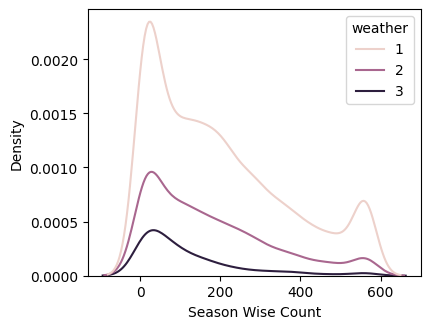

In [ ]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,
wspace=0.3, hspace=0.4)
plt.subplot(2,3,1)
sns.kdeplot(data=df3,x="count",hue="weather")
plt.xlabel("Season Wise Count")

  Insights
Normality Test (Shapiro-Wilk):
All weather categories (clear, mist/cloudy, light snow) failed the normality test.
Indicates that rental count data is not normally distributed across weather types.

Variance Test (Levene's Test):
Significant difference in variances between weather categories.
Confirms that homogeneity of variance assumption is violated.

Kruskal-Wallis Test:
P-value is extremely low (4.00e-45), leading to rejection of the null hypothesis.
This means at least one weather condition has a significantly different median rental count.
Weather Condition 1 (Clear):
Median rental count is highest (~150).
Wide IQR (approx. 50–300) and long whiskers indicate high variability.
Several outliers above 500 suggest occasional spikes in demand.

Weather Condition 2 (Mist/Cloudy):
Median is slightly lower (~100).
Similar spread to condition 1 but slightly compressed.
Outliers present, though fewer than condition 1.

Weather Condition 3 (Light Snow):
Lowest median (~80–100).
Narrower IQR and shorter whiskers suggest more consistent but lower demand.
Fewer outliers, indicating less extreme rental behavior.


Recommendations
Weather-Specific Planning:
Increase bike availability and staffing during clear weather, where demand is highest and most variable.
Prepare for moderate demand during mist/cloudy conditions.
Consider reducing operations or offering incentives during light snow, where demand is consistently lower.

Outlier Management:
Investigate high-demand days (outliers) to understand what drives spikes — events, holidays, etc.

Dynamic Pricing or Promotions:
Use weather forecasts to adjust pricing or offer discounts during low-demand weather types.

# Q.  Check if the demand of bicycles on rent is the same for different season?

 1) Normality Test :
 First we will do Shapiro-Wilk's test to check the data is Normally distributed or not.
 Shapiro-Wilk Test
 Null Hypothesis, H0 = Each season category is normally distributed
 Alternate Hypothesis, Ha = One of the season rental counts are not Normally distributed

In [ ]:
spring = df3[df3["season"]==1]["count"]
summer = df3[df3["season"]==2]["count"]
fall = df3[df3["season"]==3]["count"]
winter = df3[df3["season"]==4]["count"]

In [ ]:
spring_stats,spring_p_value = shapiro(spring)
summer_stats,summer_p_value = shapiro(summer)
fall_stats,fall_p_value = shapiro(fall)
winter_stats,winter_p_value = shapiro(winter)

In [ ]:
print("The Shapiro test P value of spring rental counts are ",spring_p_value)
if(clear_p_value <= 0.05):
    print("Successfully rejected null hypothesis, the spring rental counts are not normally distributed")
else:
    print("Accepted null hypothesis, the spring rental counts are normally distributed")
print()
print("The Shapiro test P value of summer rental counts are ",summer_p_value)
if(clear_p_value <= 0.05):
    print("Successfully rejected null hypothesis, the summer rental counts are not normally distributed")
else:
    print("Accepted null hypothesis, the summer rental counts are normally distributed")
print()
print("The Shapiro test P value of fall season rental counts ",fall_p_value)
if(clear_p_value <= 0.05):
    print("Successfully rejected null hypothesis, the fall season rental counts are not normally distributed")
else:
    print("Accepted null hypothesis, the fall season rental counts are normally distributed")
print()
print("The Shapiro test P value of winter season rental counts ",winter_p_value)
if(clear_p_value <= 0.05):
    print("Successfully rejected null hypothesis, the winter season rental counts are not normally distributed")
else:
    print("Accepted null hypothesis, the winter season rental counts are normally distributed")
print()
if(spring_p_value<=0.05 or summer_p_value<=0.05 or fall_p_value<=0.05 or winter_p_value<=0.05):
    print("One or more category of different season are not normally distributed, we have to use non parametric test")
else:
    print("All the different seasons data follows normal distribution, lets go to step 2, to check for equal variance test")



The Shapiro test P value of spring rental counts are  6.386858340030782e-48
Successfully rejected null hypothesis, the spring rental counts are not normally distributed

The Shapiro test P value of summer rental counts are  1.899788377396792e-38
Successfully rejected null hypothesis, the summer rental counts are not normally distributed

The Shapiro test P value of fall season rental counts  4.388064962591493e-35
Successfully rejected null hypothesis, the fall season rental counts are not normally distributed

The Shapiro test P value of winter season rental counts  1.2850899585086535e-37
Successfully rejected null hypothesis, the winter season rental counts are not normally distributed

One or more category of different season are not normally distributed, we have to use non parametric test


 As both the tests, normality test and variance test are failing, we will go for non parametric test to find wether different weather conditions have similar median or not.

 Kruskal Wallis Test

 Null Hypothesis, H0 = All the weather conditions have same median
 Alternate Hypothesis, Ha = Atleast one of the weather condition have significantly different median as compared to others

 Significance Level, alpha = 0.05

In [ ]:
sk_stat,sk_p_value = kruskal(spring,summer,fall,winter)
alpha = 0.05

In [ ]:
print("The Kruskal test P value of different seasons are ",sk_p_value)
if(kruskal_p_value <= alpha):
    print("Successfully rejected null hypothesis, Atleast one of the seasons have significantly different median as compared to others")
else:
    print("Accepted null hypothesis, All the seasons rental count have same median")

The Kruskal test P value of different seasons are  2.4688288437668016e-149
Successfully rejected null hypothesis, Atleast one of the seasons have significantly different median as compared to others


<Axes: ylabel='count'>

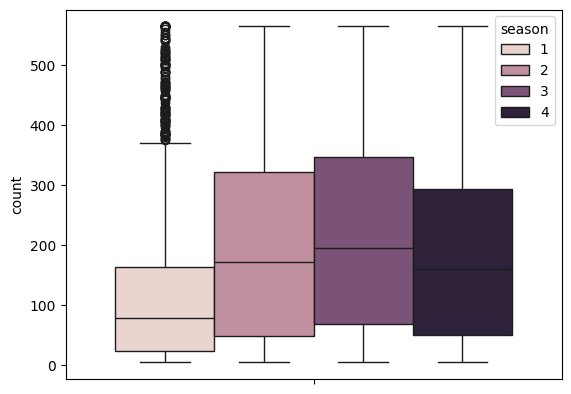

In [ ]:
sns.boxplot(data=df3,y="count",hue="season")

 Insights from Seasonal Rental Analysis
Kruskal-Wallis Test:
P-value = 2.47e-149, which is far below the significance level (α = 0.05).
This leads to rejection of the null hypothesis, indicating that at least one season has a significantly different median rental count compared to others.

Box Plot Observations:
The box plot shows clear variation in rental counts across seasons.
Some seasons have higher medians and wider interquartile ranges, suggesting more demand and variability.
Presence of outliers in certain seasons indicates occasional spikes in rentals.

Recommendations
Seasonal Demand Planning:
Allocate more bikes and resources during high-demand seasons (e.g., summer or fall).
Consider scaling down operations during low-demand seasons to optimize costs.

Targeted Promotions:
Run season-specific campaigns to boost rentals during off-peak seasons.
Offer discounts or bundled services in seasons with lower median counts.

Forecasting & Inventory Management:
Use seasonal trends to build predictive models for demand forecasting.
Adjust inventory and maintenance schedules based on expected seasonal usage.

# Q.  Check if the Weather conditions are significantly different during different Seasons?

 As both the columns are categorical, we have to use Chi-Square test
Chi-Square Test:

 Null Hypothesis, H0 = The two parameters, season and weather are independent
Alternate Hypothesis, Ha = The two parameters, season and weather are not independents
 Significance Level, alpha = 0.05

In [ ]:
pd.crosstab(index=df3["weather"], columns=df3["season"],margins=True)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,212,224,199,225,860
All,2686,2733,2733,2734,10886


In [ ]:
val=pd.crosstab(index=df["season"],columns=df["weather"])
chi2_contingency(val)
alpha = 0.05

 As the p_value is less than the alpha,
 We are rejecting the null hypothesis, and the two parameters season and weather are independent

Insights

Hypothesis Setup
Null Hypothesis (H₀): Season and weather are independent.
Alternative Hypothesis (H₁): Season and weather are not independent.

Chi-square Test Result
The p-value is less than 0.05 (α), so we reject the null hypothesis.
This means season and weather are significantly associated—weather conditions vary across different seasons.

Observed Distribution
Weather type 1 (likely clear or sunny) dominates across all seasons.
Weather type 2 (cloudy/misty) is less frequent but still present in all seasons.
Weather type 3 (rainy/snowy) is rare compared to others.

Recommendations

Seasonal Planning
Since weather patterns differ by season, plan activities, resources, and operations accordingly (e.g., outdoor events in clear-weather seasons).

Forecasting & Resource Allocation
Use this association to improve predictive models for demand, transportation, or energy usage based on seasonal weather trends.

Risk Management
Prepare contingency plans for seasons with higher chances of adverse weather (e.g., rainy or snowy conditions).

Further Analysis
Consider segmenting by location or time of day for deeper insights.
Explore whether extreme weather events cluster in specific seasons.